# Train-Validation

In [170]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from paretoset import paretoset
import numpy as np

In [171]:
percentages = [2.5, 5, 25, 50, 75, 100, 200]
datasets_names = {
    'kuhar': 'KH',
    'motionsense': 'MS',
    'realworld_thigh': 'RW-T',
    'realworld_waist': 'RW-W',
    'uci': 'UCI',
    'wisdm': 'WISDM',
}

# RQ1

Table

In [172]:
max_df = pd.read_csv('hs_max.csv')
TV_nor_df = pd.read_csv('TV_no_reducer_scores.csv')
TVT_nor_df = pd.read_csv('TVT_no_reducer_scores.csv')
TVT_max_df = pd.read_csv('hs_max_TVT.csv')
# Change dataset names
max_df['dataset'] = max_df['dataset'].map(datasets_names)
TV_nor_df['dataset'] = TV_nor_df['dataset'].map(datasets_names)
TVT_nor_df['dataset'] = TVT_nor_df['dataset'].map(datasets_names)
TVT_max_df['dataset'] = TVT_max_df['dataset'].map(datasets_names)

In [173]:
max_reordered = max_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T
nor_reordered = TV_nor_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T

In [174]:
data = pd.concat([nor_reordered, max_reordered])
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))

\begin{tabular}{lrrrrrr}
\hline
 model      &   KH &   MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 no\_reducer & 0.67 & 0.79 &   0.67 &   0.79 &  0.85 &    0.75 \\
 ae         & 0.69 & 0.79 &   0.68 &   0.84 &  0.82 &    0.77 \\
 convae     & 0.78 & 0.81 &   0.76 &   0.84 &  0.84 &    0.81 \\
 convtae    & 0.78 & 0.82 &   0.78 &   0.84 &  0.84 &    0.83 \\
 tae        & 0.69 & 0.70 &   0.66 &   0.80 &  0.79 &    0.77 \\
 umap       & 0.43 & 0.66 &   0.60 &   0.65 &  0.78 &    0.64 \\
\hline
\end{tabular}


In [175]:
data.loc['TAE - AE'] = data.loc['tae'] - data.loc['ae']
data.loc['ConvTAE - ConvAE'] = data.loc['convtae'] - data.loc['convae']
data.loc['ConvAE - AE'] = data.loc['convae'] - data.loc['ae']
data.loc['ConvTAE - TAE'] = data.loc['convtae'] - data.loc['tae']
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))
data.drop(['TAE - AE', 'ConvTAE - ConvAE', 'ConvAE - AE', 'ConvTAE - TAE'], inplace=True)


\begin{tabular}{lrrrrrr}
\hline
 model            &    KH &    MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 no\_reducer       &  0.67 &  0.79 &   0.67 &   0.79 &  0.85 &    0.75 \\
 ae               &  0.69 &  0.79 &   0.68 &   0.84 &  0.82 &    0.77 \\
 convae           &  0.78 &  0.81 &   0.76 &   0.84 &  0.84 &    0.81 \\
 convtae          &  0.78 &  0.82 &   0.78 &   0.84 &  0.84 &    0.83 \\
 tae              &  0.69 &  0.70 &   0.66 &   0.80 &  0.79 &    0.77 \\
 umap             &  0.43 &  0.66 &   0.60 &   0.65 &  0.78 &    0.64 \\
 TAE - AE         & -0.00 & -0.09 &  -0.02 &  -0.04 & -0.03 &   -0.00 \\
 ConvTAE - ConvAE &  0.00 &  0.01 &   0.03 &   0.00 &  0.01 &    0.02 \\
 ConvAE - AE      &  0.10 &  0.01 &   0.07 &  -0.00 &  0.01 &    0.04 \\
 ConvTAE - TAE    &  0.10 &  0.12 &   0.13 &   0.04 &  0.05 &    0.06 \\
\hline
\end{tabular}


In [176]:
data = data.div(data.iloc[0], axis=1)
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))

\begin{tabular}{lrrrrrr}
\hline
 model      &   KH &   MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 no\_reducer & 1.00 & 1.00 &   1.00 &   1.00 &  1.00 &    1.00 \\
 ae         & 1.03 & 1.01 &   1.02 &   1.07 &  0.97 &    1.04 \\
 convae     & 1.17 & 1.03 &   1.13 &   1.07 &  0.99 &    1.09 \\
 convtae    & 1.17 & 1.04 &   1.17 &   1.07 &  1.00 &    1.11 \\
 tae        & 1.02 & 0.89 &   0.98 &   1.01 &  0.94 &    1.03 \\
 umap       & 0.64 & 0.84 &   0.89 &   0.83 &  0.92 &    0.86 \\
\hline
\end{tabular}


In [177]:
data.loc['TAE - AE'] = data.loc['tae'] - data.loc['ae']
data.loc['ConvTAE - ConvAE'] = data.loc['convtae'] - data.loc['convae']
data.loc['ConvAE - AE'] = data.loc['convae'] - data.loc['ae']
data.loc['ConvTAE - TAE'] = data.loc['convtae'] - data.loc['tae']
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))
data.drop(['TAE - AE', 'ConvTAE - ConvAE', 'ConvAE - AE', 'ConvTAE - TAE'], inplace=True)


\begin{tabular}{lrrrrrr}
\hline
 model            &    KH &    MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 no\_reducer       &  1.00 &  1.00 &   1.00 &   1.00 &  1.00 &    1.00 \\
 ae               &  1.03 &  1.01 &   1.02 &   1.07 &  0.97 &    1.04 \\
 convae           &  1.17 &  1.03 &   1.13 &   1.07 &  0.99 &    1.09 \\
 convtae          &  1.17 &  1.04 &   1.17 &   1.07 &  1.00 &    1.11 \\
 tae              &  1.02 &  0.89 &   0.98 &   1.01 &  0.94 &    1.03 \\
 umap             &  0.64 &  0.84 &   0.89 &   0.83 &  0.92 &    0.86 \\
 TAE - AE         & -0.00 & -0.12 &  -0.04 &  -0.05 & -0.03 &   -0.01 \\
 ConvTAE - ConvAE &  0.00 &  0.01 &   0.04 &   0.00 &  0.01 &    0.02 \\
 ConvAE - AE      &  0.14 &  0.02 &   0.11 &  -0.00 &  0.02 &    0.05 \\
 ConvTAE - TAE    &  0.14 &  0.15 &   0.19 &   0.05 &  0.06 &    0.08 \\
\hline
\end{tabular}


In [178]:
data = pd.concat([
    TVT_nor_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T,
    TVT_max_df.groupby(['dataset', 'model']).max().pivot_table(index='dataset', columns='model', values='score').T
    ])
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))

\begin{tabular}{lrrrrrr}
\hline
 model      &   KH &   MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 no\_reducer & 0.80 & 0.89 &   0.70 &   0.66 &  0.89 &    0.77 \\
 ae         & 0.72 & 0.81 &   0.68 &   0.61 &  0.76 &    0.72 \\
 convae     & 0.70 & 0.82 &   0.71 &   0.66 &  0.79 &    0.74 \\
 convtae    & 0.69 & 0.85 &   0.62 &   0.62 &  0.78 &    0.79 \\
 tae        & 0.69 & 0.75 &   0.67 &   0.66 &  0.70 &    0.72 \\
 umap       & 0.62 & 0.77 &   0.64 &   0.54 &  0.67 &    0.61 \\
\hline
\end{tabular}


In [179]:
data.loc['TAE - AE'] = data.loc['tae'] - data.loc['ae']
data.loc['ConvTAE - ConvAE'] = data.loc['convtae'] - data.loc['convae']
data.loc['ConvAE - AE'] = data.loc['convae'] - data.loc['ae']
data.loc['ConvTAE - TAE'] = data.loc['convtae'] - data.loc['tae']
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))
data.drop(['TAE - AE', 'ConvTAE - ConvAE', 'ConvAE - AE', 'ConvTAE - TAE'], inplace=True)

\begin{tabular}{lrrrrrr}
\hline
 model            &    KH &    MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 no\_reducer       &  0.80 &  0.89 &   0.70 &   0.66 &  0.89 &    0.77 \\
 ae               &  0.72 &  0.81 &   0.68 &   0.61 &  0.76 &    0.72 \\
 convae           &  0.70 &  0.82 &   0.71 &   0.66 &  0.79 &    0.74 \\
 convtae          &  0.69 &  0.85 &   0.62 &   0.62 &  0.78 &    0.79 \\
 tae              &  0.69 &  0.75 &   0.67 &   0.66 &  0.70 &    0.72 \\
 umap             &  0.62 &  0.77 &   0.64 &   0.54 &  0.67 &    0.61 \\
 TAE - AE         & -0.02 & -0.06 &  -0.01 &   0.05 & -0.06 &   -0.01 \\
 ConvTAE - ConvAE & -0.02 &  0.02 &  -0.09 &  -0.05 & -0.01 &    0.05 \\
 ConvAE - AE      & -0.01 &  0.02 &   0.03 &   0.05 &  0.03 &    0.02 \\
 ConvTAE - TAE    & -0.00 &  0.09 &  -0.05 &  -0.05 &  0.08 &    0.07 \\
\hline
\end{tabular}


In [180]:
data = data.div(data.iloc[0], axis=1)
data['min'] = data.min(axis=1)
data['max'] = data.max(axis=1)
data['mean'] = data.mean(axis=1)
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))

\begin{tabular}{lrrrrrrrrr}
\hline
 model      &   KH &   MS &   RW-T &   RW-W &   UCI &   WISDM &   min &   max &   mean \\
\hline
 no\_reducer & 1.00 & 1.00 &   1.00 &   1.00 &  1.00 &    1.00 &  1.00 &  1.00 &   1.00 \\
 ae         & 0.90 & 0.91 &   0.98 &   0.92 &  0.86 &    0.94 &  0.86 &  0.98 &   0.92 \\
 convae     & 0.88 & 0.93 &   1.02 &   1.00 &  0.89 &    0.96 &  0.88 &  1.02 &   0.95 \\
 convtae    & 0.86 & 0.95 &   0.89 &   0.93 &  0.88 &    1.03 &  0.86 &  1.03 &   0.93 \\
 tae        & 0.87 & 0.85 &   0.96 &   1.00 &  0.79 &    0.93 &  0.79 &  1.00 &   0.90 \\
 umap       & 0.78 & 0.87 &   0.92 &   0.81 &  0.76 &    0.79 &  0.76 &  0.92 &   0.83 \\
\hline
\end{tabular}


In [181]:
data.drop(['min', 'max', 'mean'], axis=1, inplace=True)
data.loc['TAE - AE'] = data.loc['tae'] - data.loc['ae']
data.loc['ConvTAE - ConvAE'] = data.loc['convtae'] - data.loc['convae']
data.loc['ConvAE - AE'] = data.loc['convae'] - data.loc['ae']
data.loc['ConvTAE - TAE'] = data.loc['convtae'] - data.loc['tae']
data['min'] = data.min(axis=1)
data['max'] = data.max(axis=1)
data['mean'] = data.mean(axis=1)
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f'))
data.drop(['TAE - AE', 'ConvTAE - ConvAE', 'ConvAE - AE', 'ConvTAE - TAE'], inplace=True)

\begin{tabular}{lrrrrrrrrr}
\hline
 model            &    KH &    MS &   RW-T &   RW-W &   UCI &   WISDM &   min &   max &   mean \\
\hline
 no\_reducer       &  1.00 &  1.00 &   1.00 &   1.00 &  1.00 &    1.00 &  1.00 &  1.00 &   1.00 \\
 ae               &  0.90 &  0.91 &   0.98 &   0.92 &  0.86 &    0.94 &  0.86 &  0.98 &   0.92 \\
 convae           &  0.88 &  0.93 &   1.02 &   1.00 &  0.89 &    0.96 &  0.88 &  1.02 &   0.95 \\
 convtae          &  0.86 &  0.95 &   0.89 &   0.93 &  0.88 &    1.03 &  0.86 &  1.03 &   0.93 \\
 tae              &  0.87 &  0.85 &   0.96 &   1.00 &  0.79 &    0.93 &  0.79 &  1.00 &   0.90 \\
 umap             &  0.78 &  0.87 &   0.92 &   0.81 &  0.76 &    0.79 &  0.76 &  0.92 &   0.83 \\
 TAE - AE         & -0.03 & -0.06 &  -0.02 &   0.08 & -0.07 &   -0.01 & -0.07 &  0.08 &  -0.01 \\
 ConvTAE - ConvAE & -0.02 &  0.03 &  -0.13 &  -0.07 & -0.01 &    0.06 & -0.13 &  0.06 &  -0.03 \\
 ConvAE - AE      & -0.01 &  0.02 &   0.04 &   0.08 &  0.03 &    0.02 & -0.

In [182]:
data = max_df.pivot_table(index='dataset', columns=['model', 'percent'], values='score').T.reset_index()
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f', showindex=False))

\begin{tabular}{lrrrrrrr}
\hline
 model   &   percent &   KH &   MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 ae      &      2.50 & 0.60 & 0.67 &   0.66 &   0.75 &  0.77 &    0.73 \\
 ae      &      5.00 & 0.65 & 0.70 &   0.66 &   0.80 &  0.78 &    0.76 \\
 ae      &     25.00 & 0.65 & 0.75 &   0.65 &   0.84 &  0.80 &    0.77 \\
 ae      &     50.00 & 0.66 & 0.77 &   0.65 &   0.84 &  0.80 &    0.77 \\
 ae      &     75.00 & 0.67 & 0.78 &   0.66 &   0.84 &  0.82 &    0.77 \\
 ae      &    100.00 & 0.68 & 0.79 &   0.66 &   0.84 &  0.81 &    0.77 \\
 ae      &    200.00 & 0.69 & 0.79 &   0.68 &   0.84 &  0.82 &    0.77 \\
 convae  &      2.50 & 0.73 & 0.71 &   0.71 &   0.81 &  0.79 &    0.74 \\
 convae  &      5.00 & 0.76 & 0.73 &   0.74 &   0.81 &  0.81 &    0.77 \\
 convae  &     25.00 & 0.77 & 0.78 &   0.74 &   0.83 &  0.82 &    0.81 \\
 convae  &     50.00 & 0.78 & 0.80 &   0.76 &   0.82 &  0.82 &    0.80 \\
 convae  &     75.00 & 0.76 & 0.80 &   0.72 &   0.84 &  0.83 &    0.81 \

In [183]:
data = max_df.pivot_table(index='dataset', columns=['model', 'percent'], values='dim').T.reset_index()
print(tabulate(data, headers='keys', tablefmt='latex', floatfmt='.2f', showindex=False))

\begin{tabular}{lrrrrrrr}
\hline
 model   &   percent &   KH &   MS &   RW-T &   RW-W &   UCI &   WISDM \\
\hline
 ae      &      2.50 &    9 &    9 &      9 &      9 &     9 &       9 \\
 ae      &      5.00 &   16 &   17 &     14 &     17 &    17 &      18 \\
 ae      &     25.00 &   74 &   90 &     76 &     85 &    26 &      55 \\
 ae      &     50.00 &   72 &  150 &     50 &    128 &   105 &      59 \\
 ae      &     75.00 &  198 &  164 &    132 &    161 &   255 &     165 \\
 ae      &    100.00 &  180 &  344 &    208 &    131 &   285 &      59 \\
 ae      &    200.00 &  337 &  626 &    525 &    106 &   531 &     719 \\
 convae  &      2.50 &    9 &    9 &      9 &      9 &     8 &       9 \\
 convae  &      5.00 &   16 &   17 &     14 &     18 &    14 &      17 \\
 convae  &     25.00 &   81 &   84 &     63 &     72 &    47 &      80 \\
 convae  &     50.00 &   57 &  160 &    148 &    128 &   108 &      49 \\
 convae  &     75.00 &  213 &  164 &     68 &    152 &   144 &     269 \

## Pareto

In [184]:
all_df = pd.read_csv('hs_all.csv')

This plot demonstrate how paretoset works 

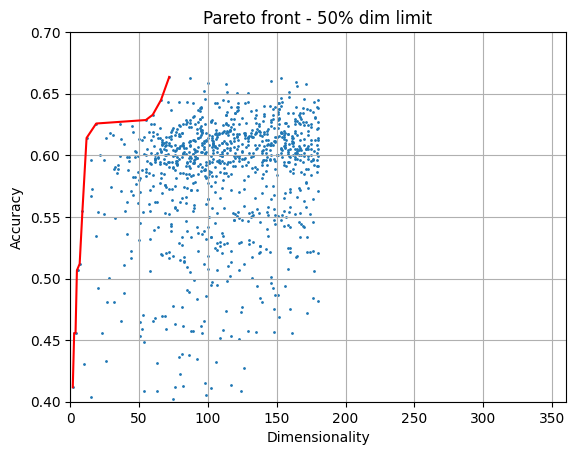

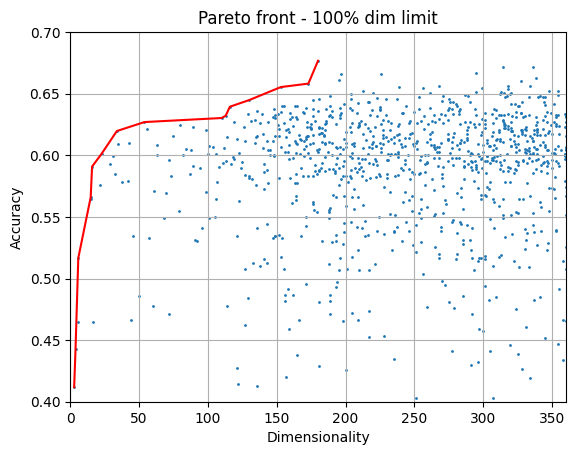

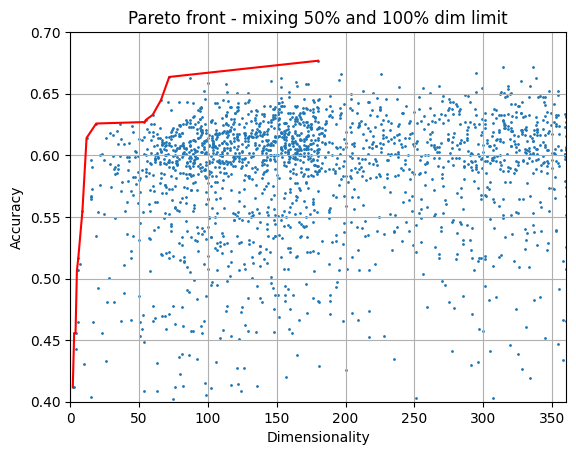

In [185]:
example = all_df[(all_df['dataset']=='kuhar') & (all_df['model']=='ae') & (all_df['percent']==50)]
mask = paretoset(example[['dim', 'score']], sense=['min', 'max'])
pareto_plt = example[mask].sort_values('dim')
plt.plot(pareto_plt['dim'], pareto_plt['score'], label='model', color='red')
plt.title('Pareto front - 50% dim limit')
plt.scatter(example['dim'],example['score'], label='model', s=1)
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.xlim(0, 360)
plt.ylim(0.4, 0.7)
plt.grid()
plt.savefig('pareto_50.png')
plt.show()

example = all_df[(all_df['dataset']=='kuhar') & (all_df['model']=='ae') & (all_df['percent']==100)]
mask = paretoset(example[['dim', 'score']], sense=['min', 'max'])
pareto_plt = example[mask].sort_values('dim')
plt.plot(pareto_plt['dim'], pareto_plt['score'], label='model', color='red')
plt.title('Pareto front - 100% dim limit')
plt.scatter(example['dim'],example['score'], label='model', s=1)
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.xlim(0, 360)
plt.ylim(0.4, 0.7)
plt.grid()
plt.savefig('pareto_100.png')
plt.show()

example = all_df[(all_df['dataset']=='kuhar') & (all_df['model']=='ae') & ((all_df['percent']==50) | (all_df['percent']==100))]
mask = paretoset(example[['dim', 'score']], sense=['min', 'max'])
pareto_plt = example[mask].sort_values('dim')
plt.plot(pareto_plt['dim'], pareto_plt['score'], label='model', color='red')
plt.title('Pareto front - mixing 50% and 100% dim limit')
plt.scatter(example['dim'],example['score'], label='model', s=1)
plt.xlabel('Dimensionality')
plt.ylabel('Accuracy')
plt.xlim(0, 360)
plt.ylim(0.4, 0.7)
plt.grid()
plt.savefig('pareto_mix.png')
plt.show()

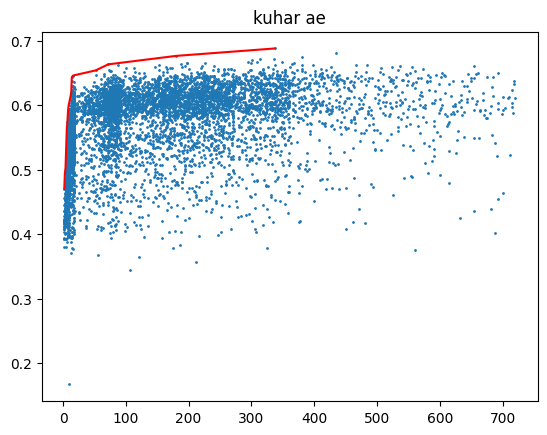

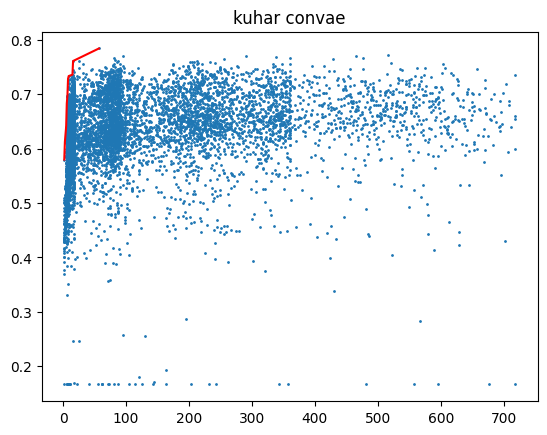

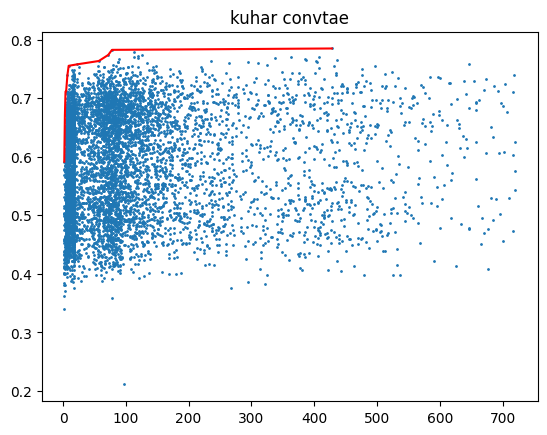

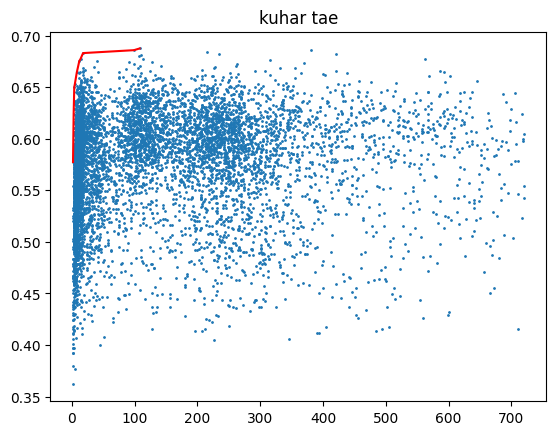

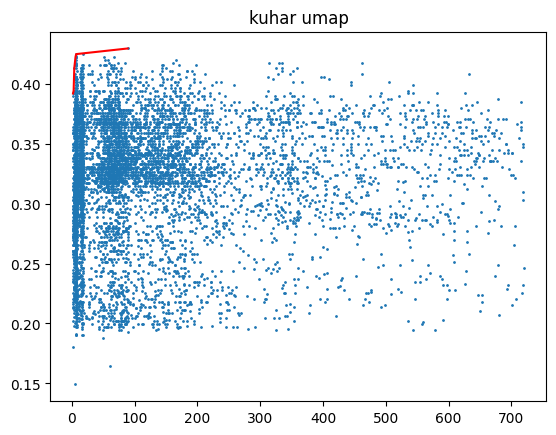

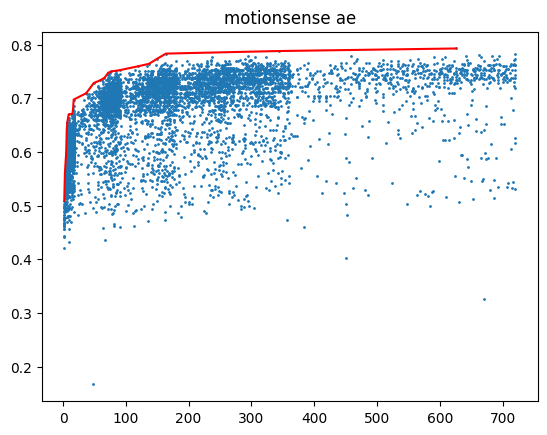

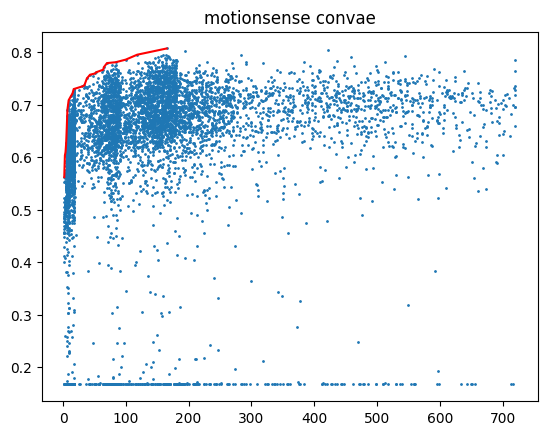

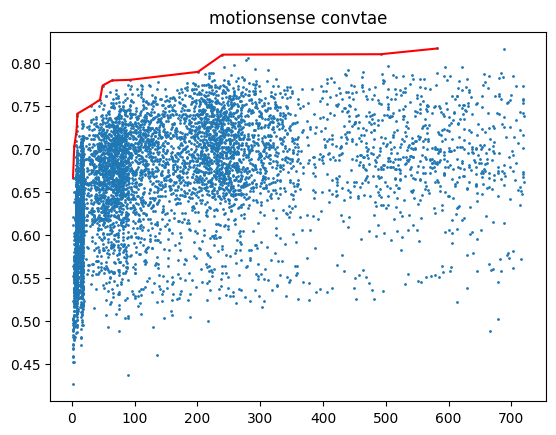

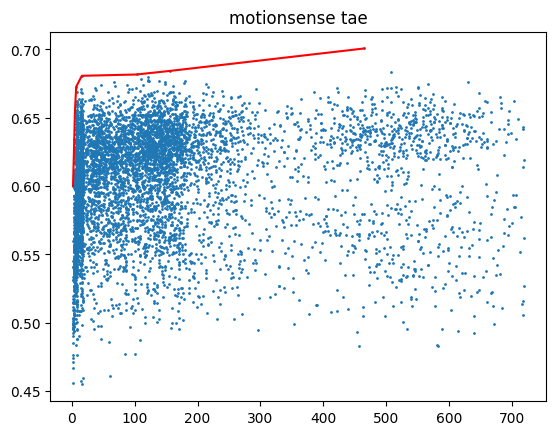

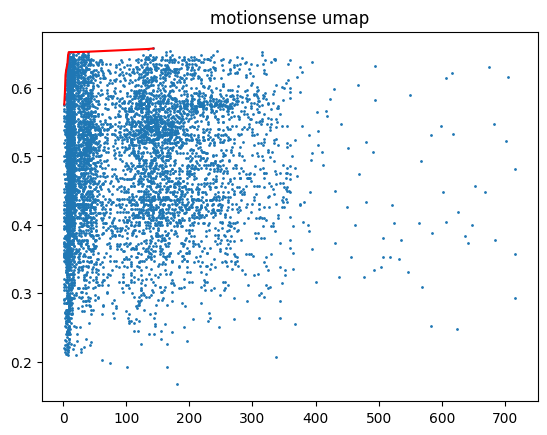

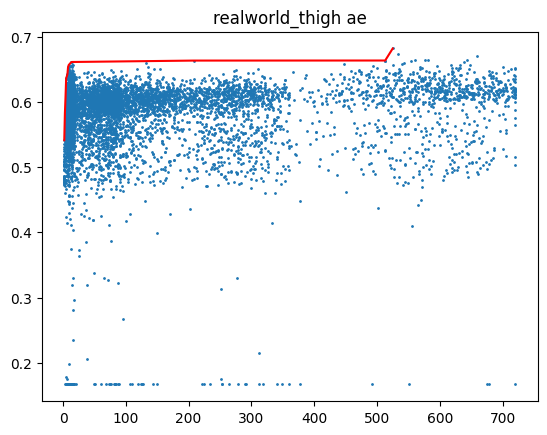

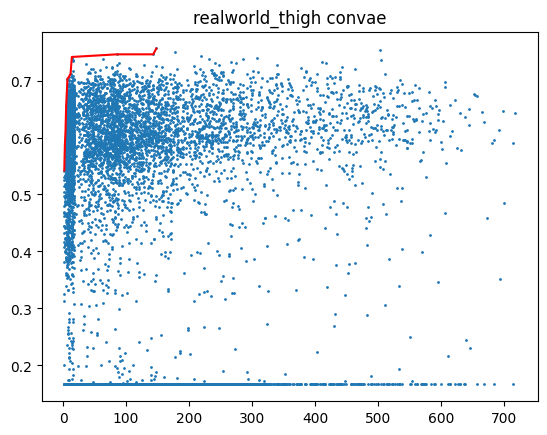

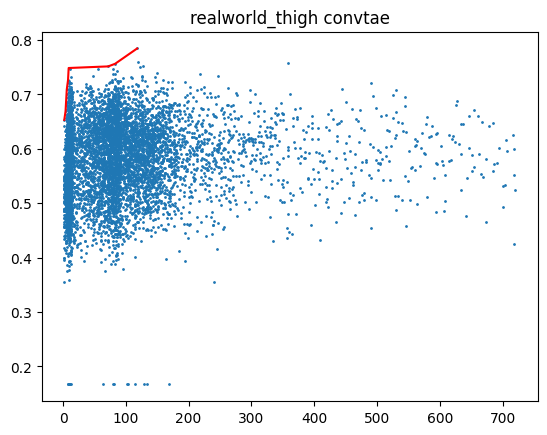

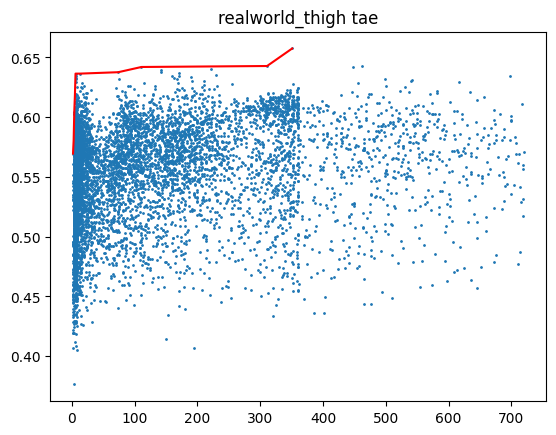

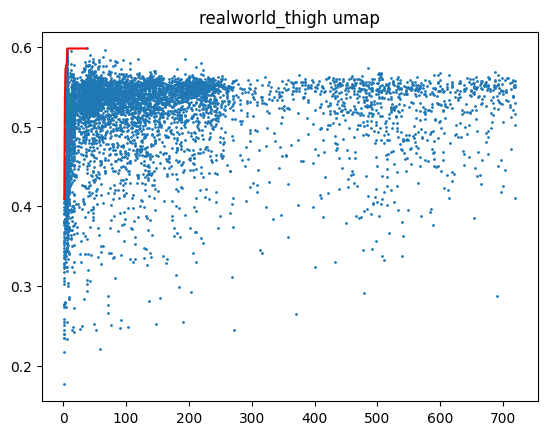

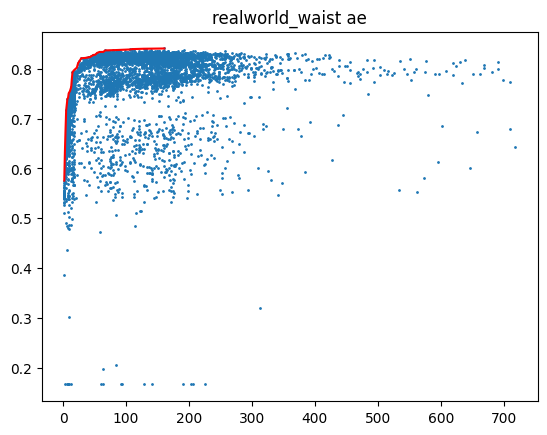

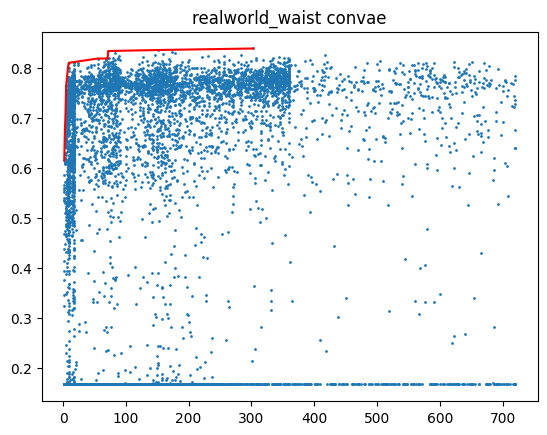

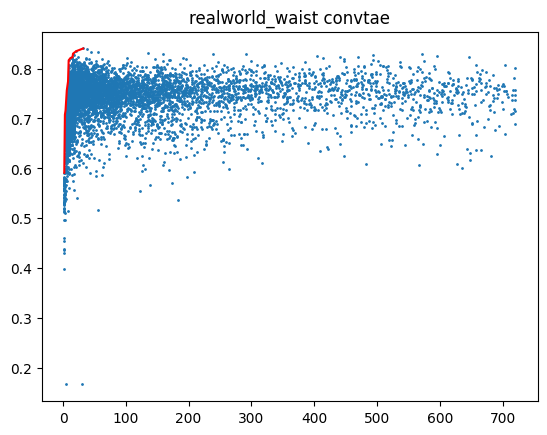

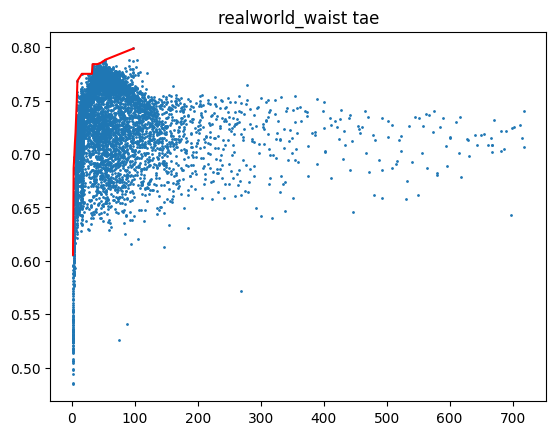

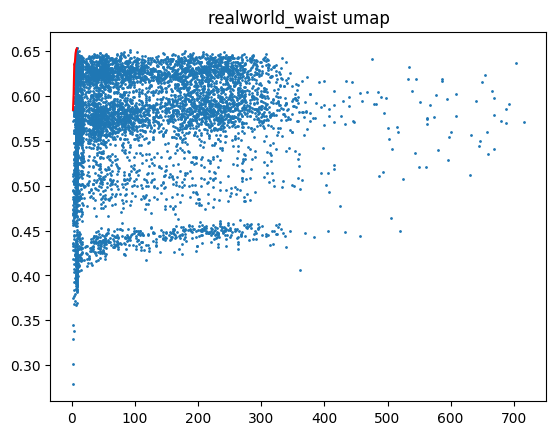

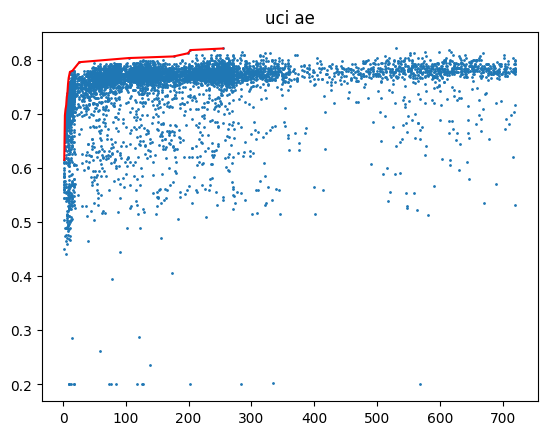

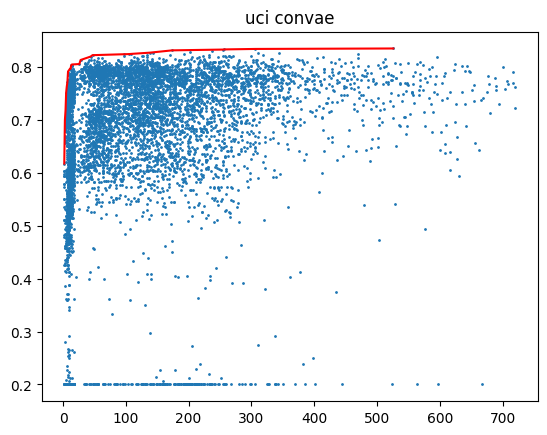

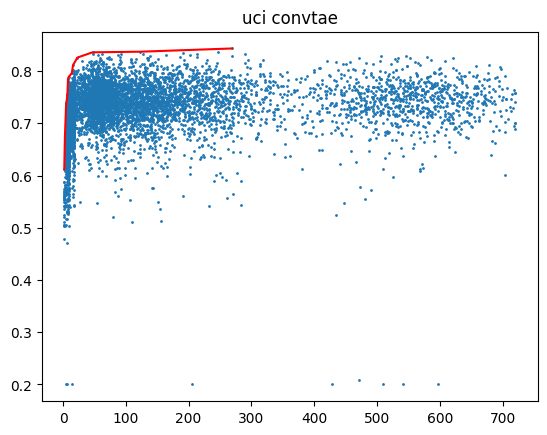

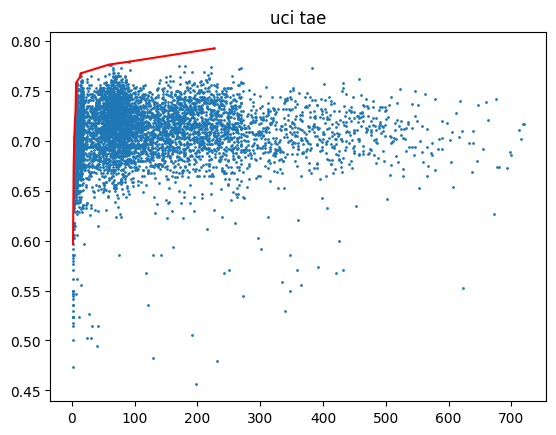

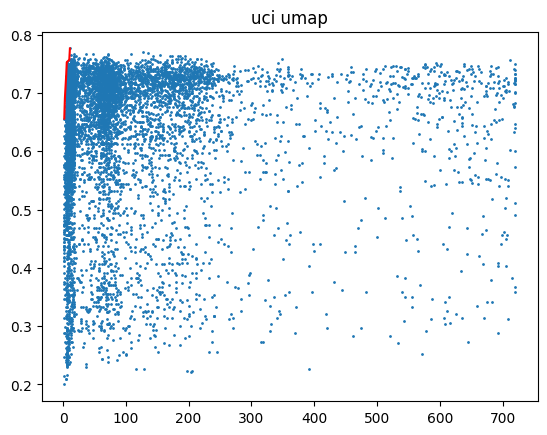

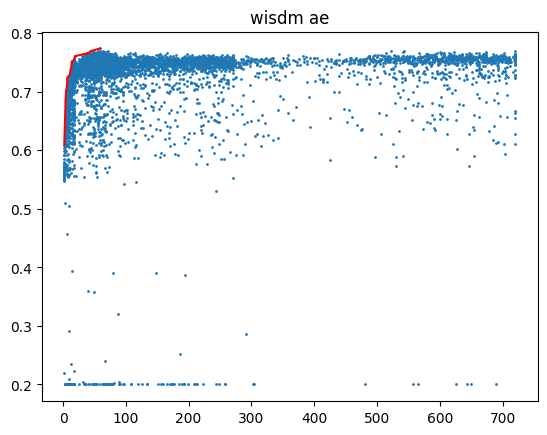

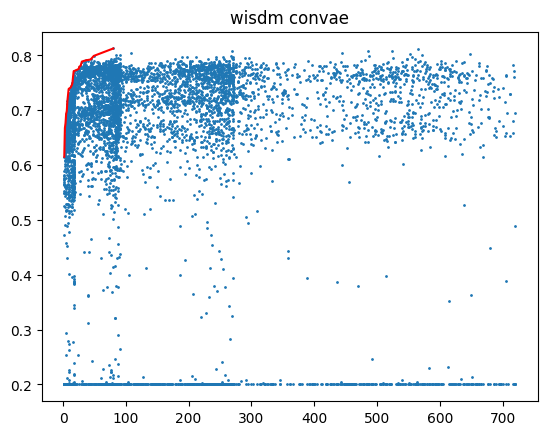

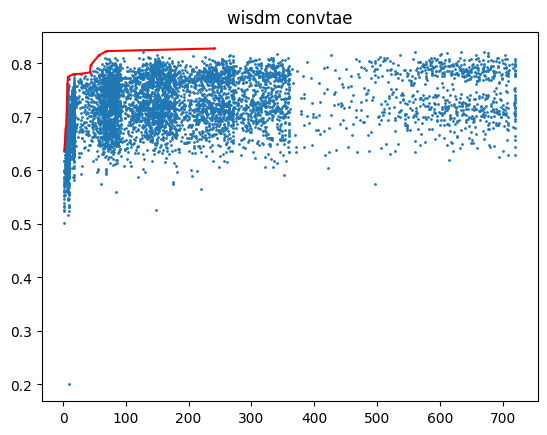

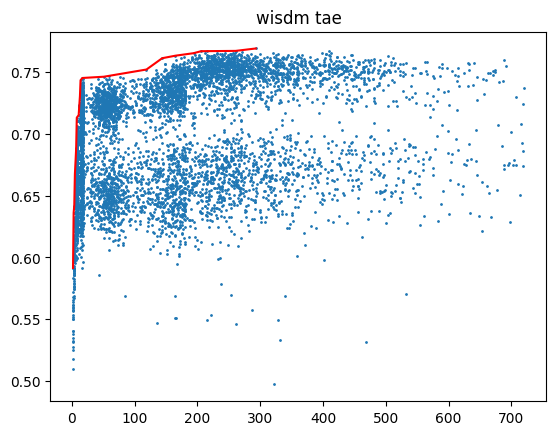

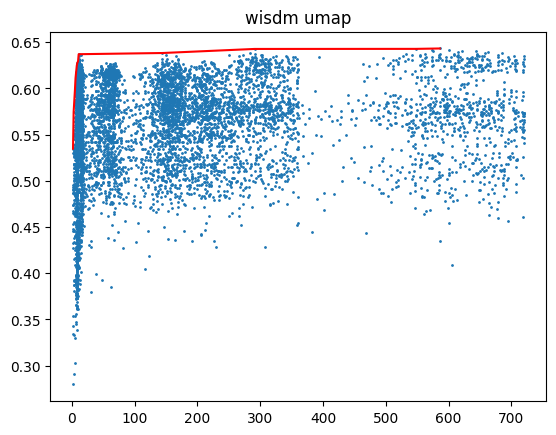

In [186]:
for (dataset, model), group in all_df.groupby(['dataset', 'model']):
    mask = paretoset(group[['dim', 'score']], sense=['min', 'max'])
    pareto_plt = group[mask].sort_values('dim')
    plt.plot(pareto_plt['dim'], pareto_plt['score'], label=model, color='red')
    plt.title(dataset + ' ' + model)
    plt.scatter(group['dim'],group['score'], label=model, s=1)
    plt.show()

Now, only pareto plots

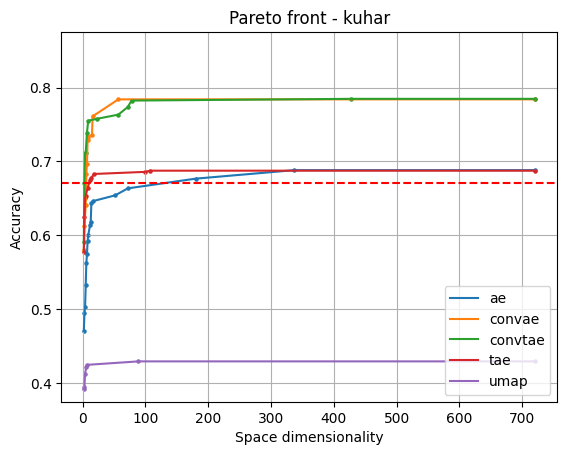

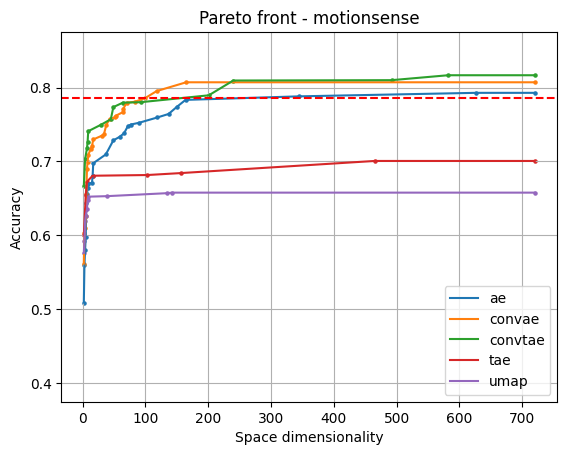

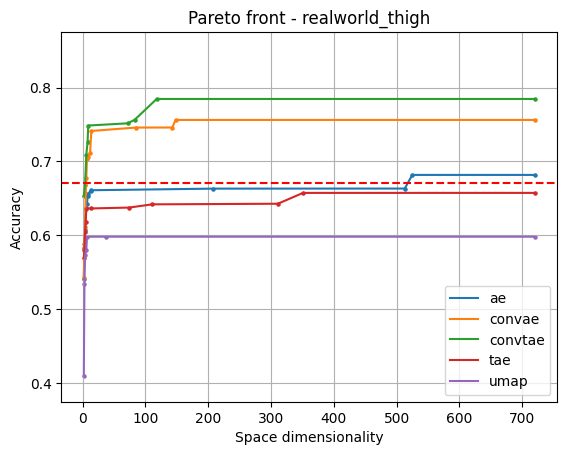

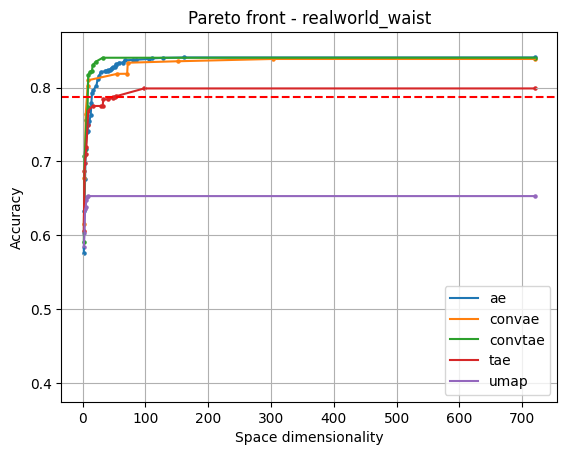

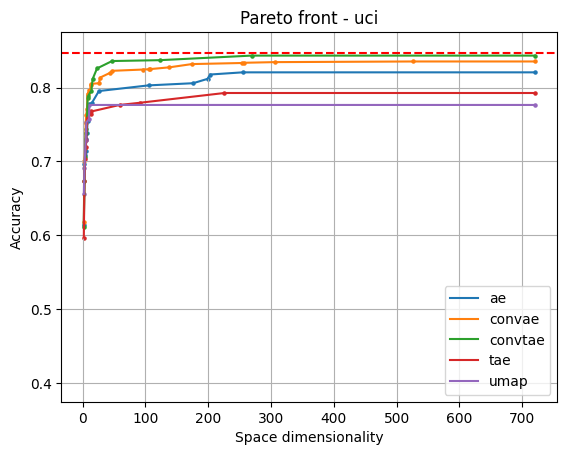

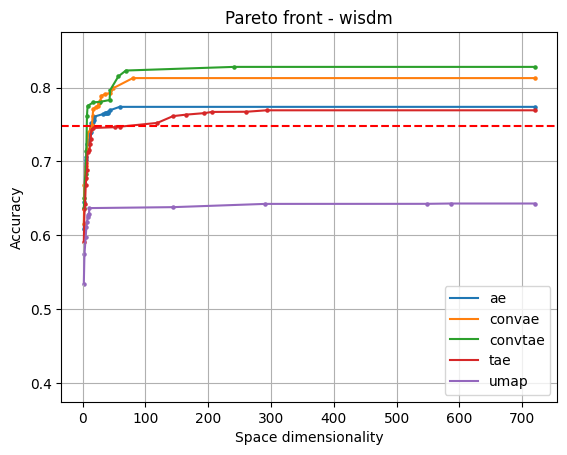

In [187]:
for index, ((dataset, model), group) in enumerate(all_df.groupby(['dataset', 'model'])):
    mask = paretoset(group[['dim', 'score']], sense=['min', 'max'])
    pareto_plt = group[mask].sort_values('dim')[['dim', 'score']].reset_index(drop=True)
    pareto_plt.loc[len(pareto_plt), :] = [720, pareto_plt.iloc[-1, -1]]
    # To confirm that the last point is the same as the second last point
    # print(pareto_plt.iloc[-2:]['score'])
    plt.plot(pareto_plt['dim'], pareto_plt['score'], label=model)
    plt.scatter(pareto_plt['dim'], pareto_plt['score'], s=5)
    if index % 5 == 4:
        plt.title('Pareto front - ' + dataset)
        plt.ylim(0.375, 0.875)
        # plt.xlim(0, 100)
        plt.xlabel('Space dimensionality')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.grid()
        # Now plotting the red line for no reducer value
        plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,datasets_names[dataset]], color='red', linestyle='--')
        # plt.axvline(x=90, color='lightgreen', linestyle='--')
        # plt.axvline(x=18, color='lightgreen', linestyle='--')
        plt.savefig('pareto-' + dataset + '.png', dpi=300)
        plt.show()

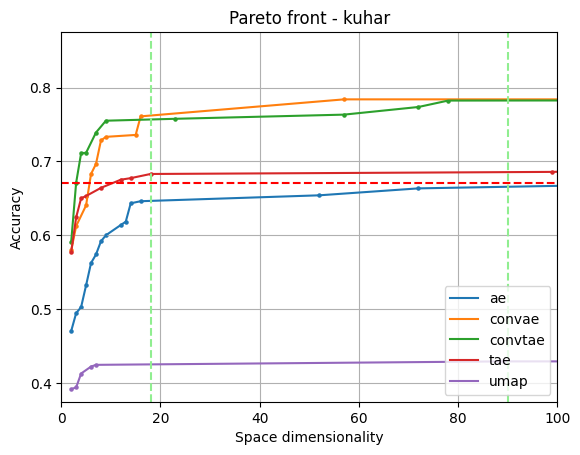

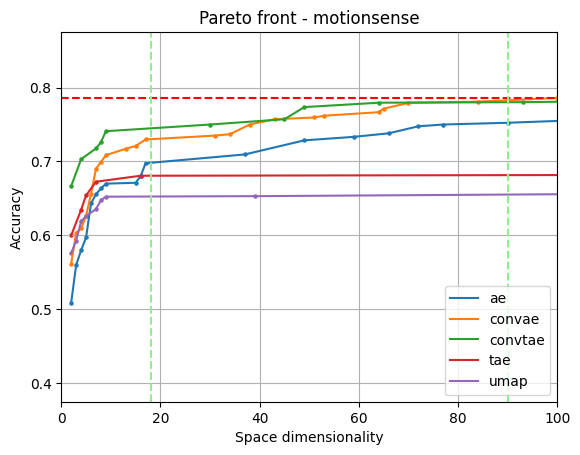

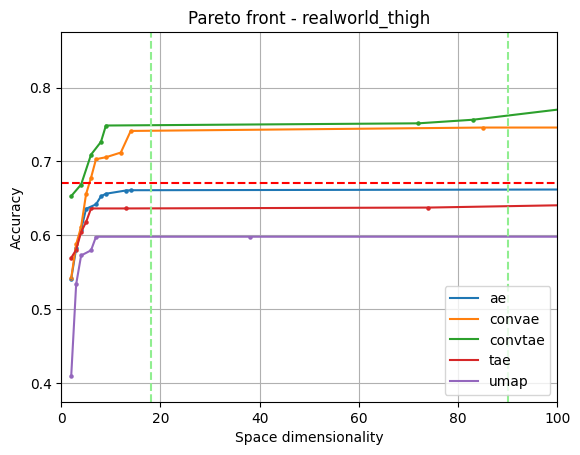

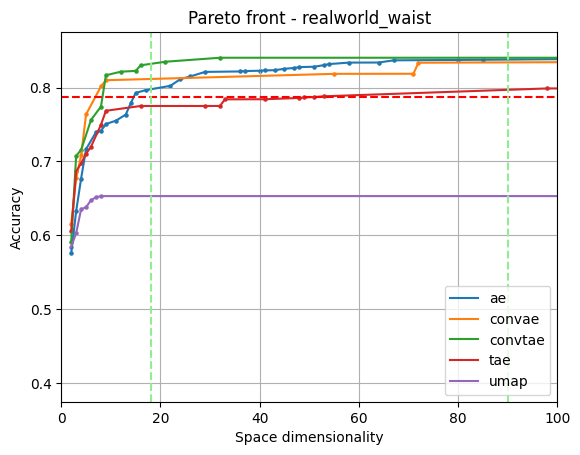

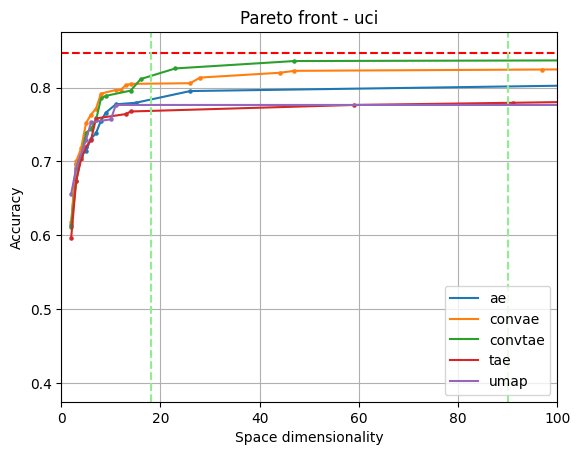

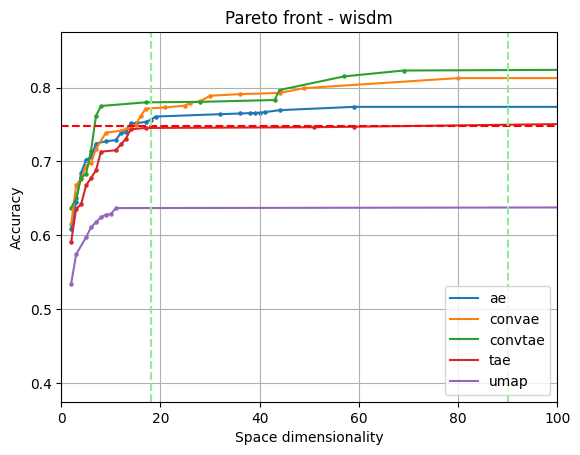

In [188]:
for index, ((dataset, model), group) in enumerate(all_df.groupby(['dataset', 'model'])):
    mask = paretoset(group[['dim', 'score']], sense=['min', 'max'])
    pareto_plt = group[mask].sort_values('dim')[['dim', 'score']].reset_index(drop=True)
    pareto_plt.loc[len(pareto_plt), :] = [720, pareto_plt.iloc[-1, -1]]
    # To confirm that the last point is the same as the second last point
    # print(pareto_plt.iloc[-2:]['score'])
    plt.plot(pareto_plt['dim'], pareto_plt['score'], label=model)
    plt.scatter(pareto_plt['dim'], pareto_plt['score'], s=5)
    if index % 5 == 4:
        plt.title('Pareto front - ' + dataset)
        plt.ylim(0.375, 0.875)
        plt.xlim(0, 100)
        plt.xlabel('Space dimensionality')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.grid()
        # Now plotting the red line for no reducer value
        plt.axhline(y=nor_reordered.reset_index(drop=True).loc[0,datasets_names[dataset]], color='red', linestyle='--')
        plt.axvline(x=90, color='lightgreen', linestyle='--')
        plt.axvline(x=18, color='lightgreen', linestyle='--')
        plt.savefig('pareto-zoom-' + dataset + '.png', dpi=300)
        plt.show()

## Comparing TAE vs AE

In [189]:
all_df

,dataset,model,percent,dim,score
0,kuhar,umap,2.5,3,0.197887
1,kuhar,umap,2.5,8,0.335681
2,kuhar,umap,2.5,4,0.230751
3,kuhar,umap,2.5,8,0.272300
4,kuhar,umap,2.5,4,0.208920
...,...,...,...,...,...
211578,realworld_waist,convtae,200.0,509,0.757821
211579,realworld_waist,convtae,200.0,540,0.730798
211580,realworld_waist,convtae,200.0,585,0.778263
211581,realworld_waist,convtae,200.0,560,0.698706


In [190]:
ae_df = all_df[(all_df['model'] == 'ae')]
tae_df = all_df[(all_df['model'] == 'tae')]

In [191]:
colors = {
    'ae': 'blue',
    'convae': 'orange',
    'convtae': 'green',
    'tae': 'red',
    'umap': 'purple'
}

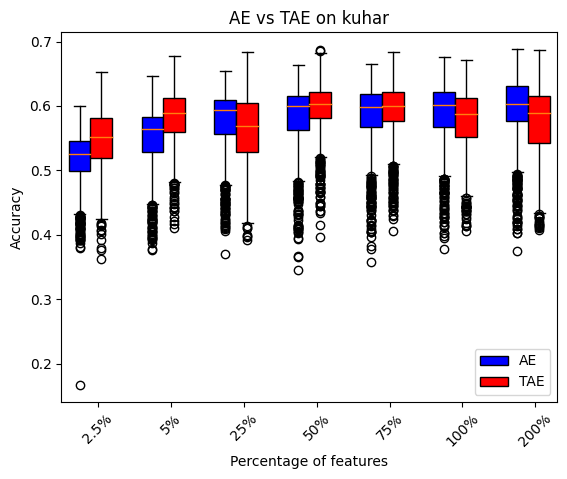

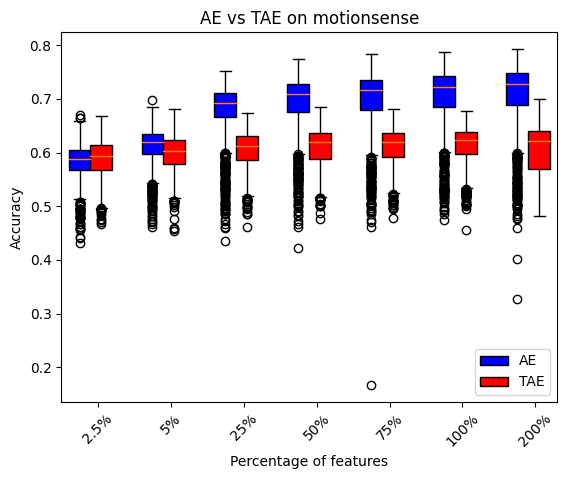

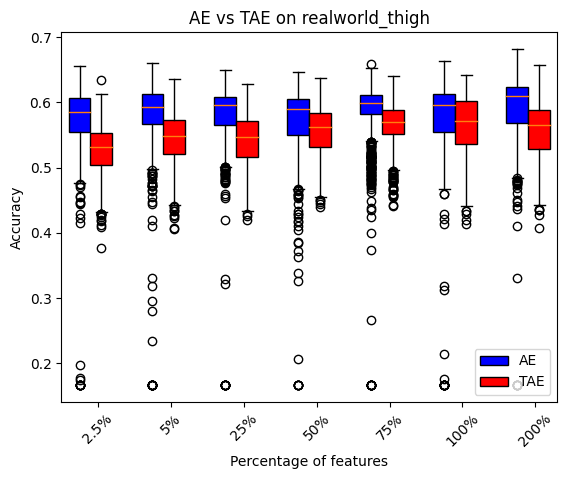

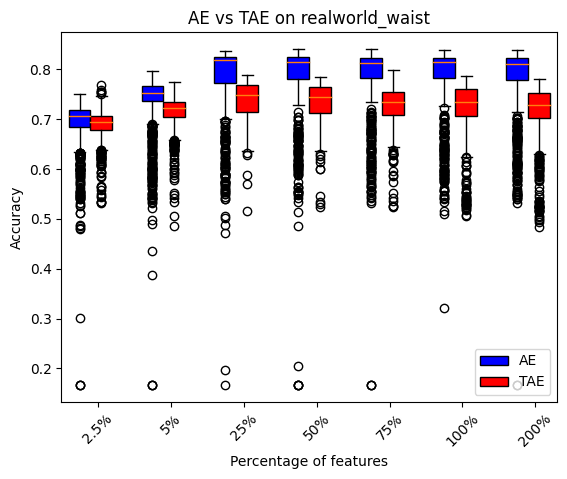

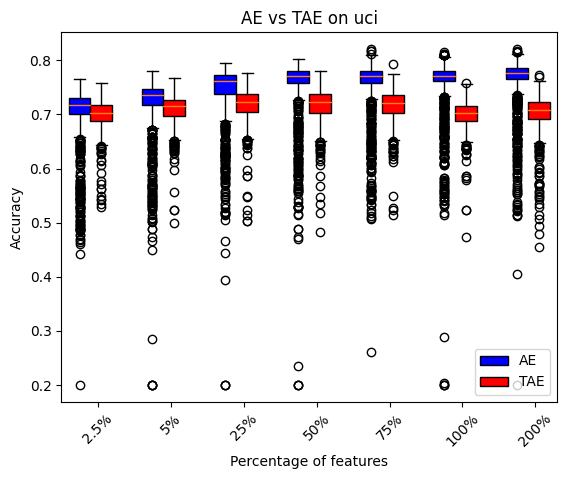

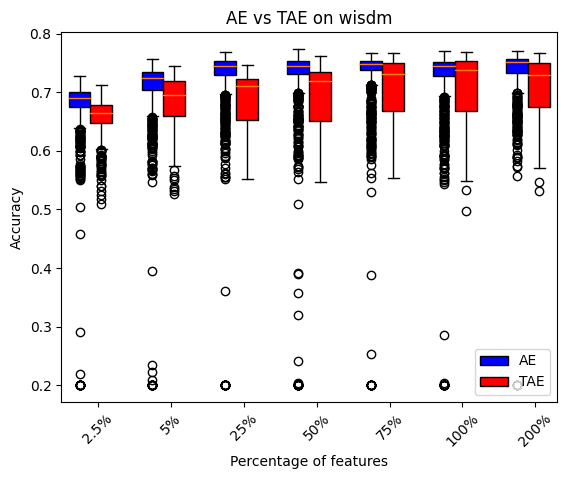

In [192]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'ae') | (all_df['model'] == 'tae')].groupby(['dataset', 'model', 'percent'])):
    # print(index, dataset, model, percent)
    pos_correction = 0 if model == 'ae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['AE', 'TAE'], loc='lower right')
        plt.title('AE vs TAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('ae-vs-tae-' + dataset + '.png', dpi=300)
        plt.show()

0 kuhar convae 2.5 [0]
1 kuhar convae 5.0 [2]
2 kuhar convae 25.0 [4]
3 kuhar convae 50.0 [6]
4 kuhar convae 75.0 [8]
5 kuhar convae 100.0 [10]
6 kuhar convae 200.0 [12]
7 kuhar convtae 2.5 [0.6]
8 kuhar convtae 5.0 [2.6]
9 kuhar convtae 25.0 [4.6]
10 kuhar convtae 50.0 [6.6]
11 kuhar convtae 75.0 [8.6]
12 kuhar convtae 100.0 [10.6]
13 kuhar convtae 200.0 [12.6]


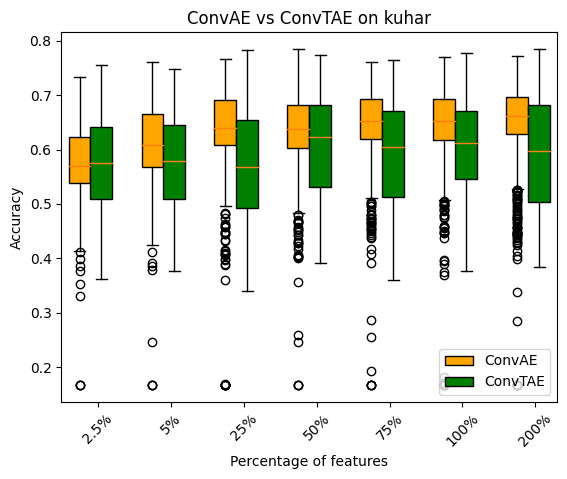

14 motionsense convae 2.5 [0]
15 motionsense convae 5.0 [2]
16 motionsense convae 25.0 [4]
17 motionsense convae 50.0 [6]
18 motionsense convae 75.0 [8]
19 motionsense convae 100.0 [10]
20 motionsense convae 200.0 [12]
21 motionsense convtae 2.5 [0.6]
22 motionsense convtae 5.0 [2.6]
23 motionsense convtae 25.0 [4.6]
24 motionsense convtae 50.0 [6.6]
25 motionsense convtae 75.0 [8.6]
26 motionsense convtae 100.0 [10.6]
27 motionsense convtae 200.0 [12.6]


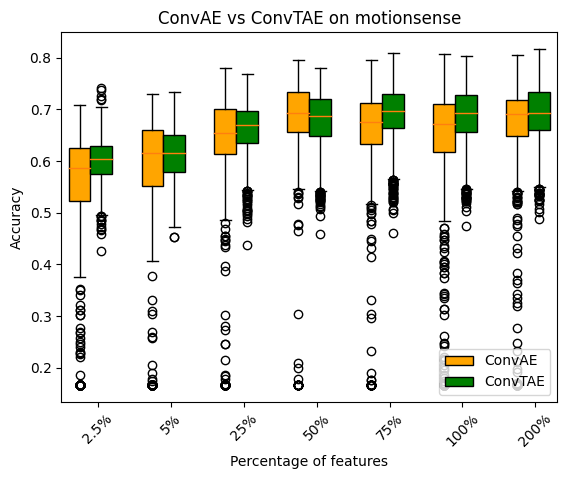

28 realworld_thigh convae 2.5 [0]
29 realworld_thigh convae 5.0 [2]
30 realworld_thigh convae 25.0 [4]
31 realworld_thigh convae 50.0 [6]
32 realworld_thigh convae 75.0 [8]
33 realworld_thigh convae 100.0 [10]
34 realworld_thigh convae 200.0 [12]
35 realworld_thigh convtae 2.5 [0.6]
36 realworld_thigh convtae 5.0 [2.6]
37 realworld_thigh convtae 25.0 [4.6]
38 realworld_thigh convtae 50.0 [6.6]
39 realworld_thigh convtae 75.0 [8.6]
40 realworld_thigh convtae 100.0 [10.6]
41 realworld_thigh convtae 200.0 [12.6]


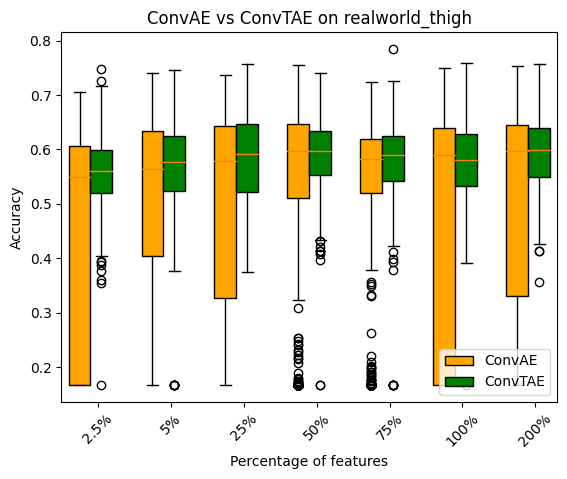

42 realworld_waist convae 2.5 [0]
43 realworld_waist convae 5.0 [2]
44 realworld_waist convae 25.0 [4]
45 realworld_waist convae 50.0 [6]
46 realworld_waist convae 75.0 [8]
47 realworld_waist convae 100.0 [10]
48 realworld_waist convae 200.0 [12]
49 realworld_waist convtae 2.5 [0.6]
50 realworld_waist convtae 5.0 [2.6]
51 realworld_waist convtae 25.0 [4.6]
52 realworld_waist convtae 50.0 [6.6]
53 realworld_waist convtae 75.0 [8.6]
54 realworld_waist convtae 100.0 [10.6]
55 realworld_waist convtae 200.0 [12.6]


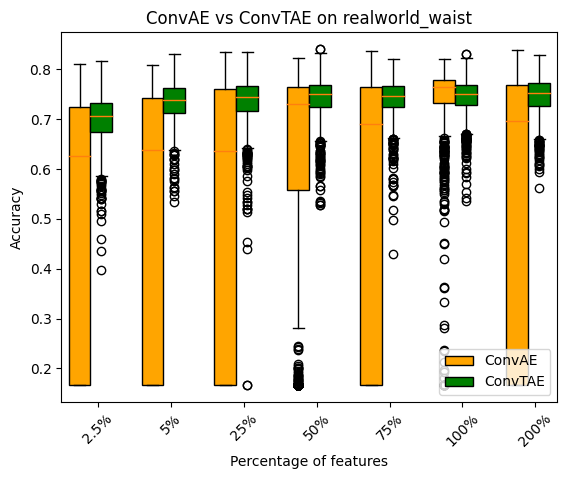

56 uci convae 2.5 [0]
57 uci convae 5.0 [2]
58 uci convae 25.0 [4]
59 uci convae 50.0 [6]
60 uci convae 75.0 [8]
61 uci convae 100.0 [10]
62 uci convae 200.0 [12]
63 uci convtae 2.5 [0.6]
64 uci convtae 5.0 [2.6]
65 uci convtae 25.0 [4.6]
66 uci convtae 50.0 [6.6]
67 uci convtae 75.0 [8.6]
68 uci convtae 100.0 [10.6]
69 uci convtae 200.0 [12.6]


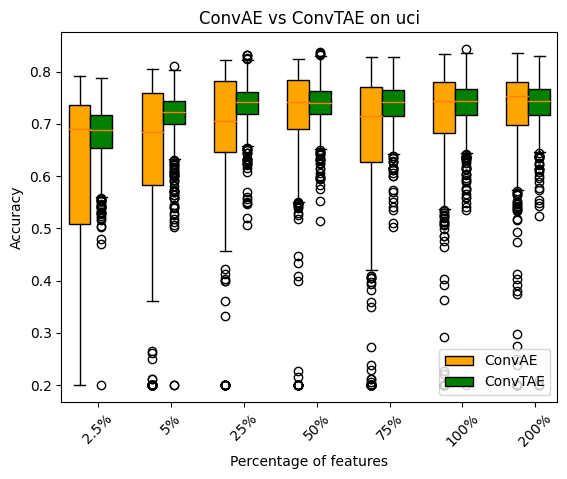

70 wisdm convae 2.5 [0]
71 wisdm convae 5.0 [2]
72 wisdm convae 25.0 [4]
73 wisdm convae 50.0 [6]
74 wisdm convae 75.0 [8]
75 wisdm convae 100.0 [10]
76 wisdm convae 200.0 [12]
77 wisdm convtae 2.5 [0.6]
78 wisdm convtae 5.0 [2.6]
79 wisdm convtae 25.0 [4.6]
80 wisdm convtae 50.0 [6.6]
81 wisdm convtae 75.0 [8.6]
82 wisdm convtae 100.0 [10.6]
83 wisdm convtae 200.0 [12.6]


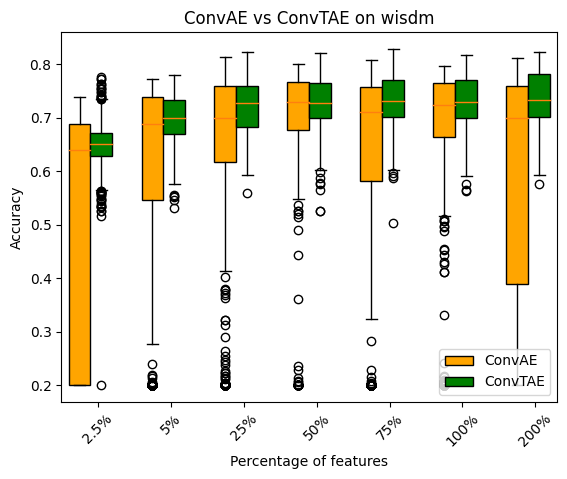

In [193]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'convae') | (all_df['model'] == 'convtae')].groupby(['dataset', 'model', 'percent'])):
    pos_correction = 0 if model == 'convae' else box_width
    print(index, dataset, model, percent, [index%7*2+pos_correction])
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['ConvAE', 'ConvTAE'], loc='lower right')
        plt.title('ConvAE vs ConvTAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('convae-vs-convtae-' + dataset + '.png', dpi=300)
        plt.show()


## AE vs ConvAE

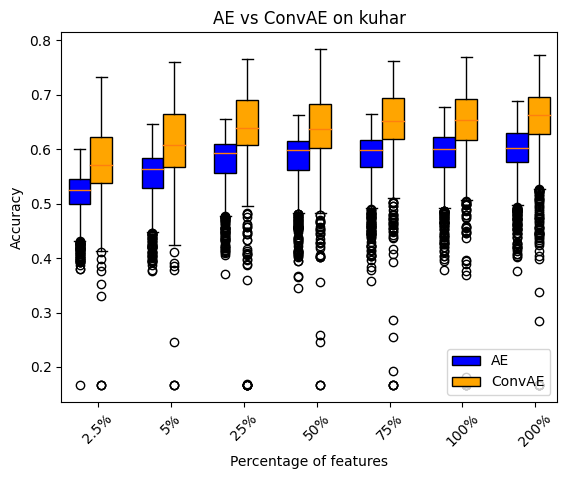

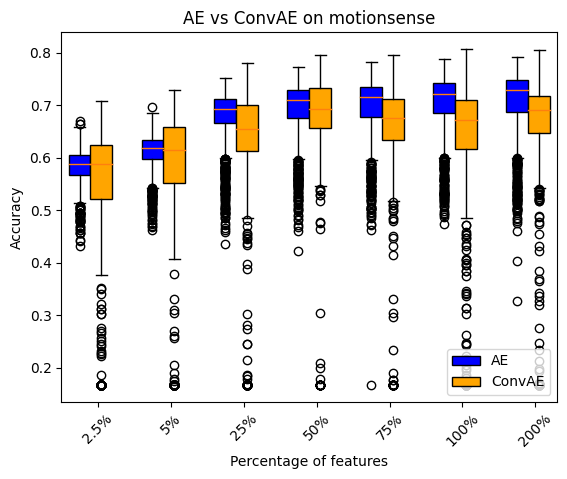

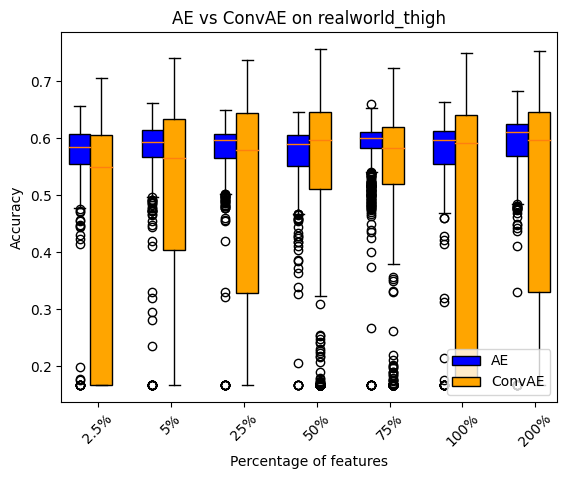

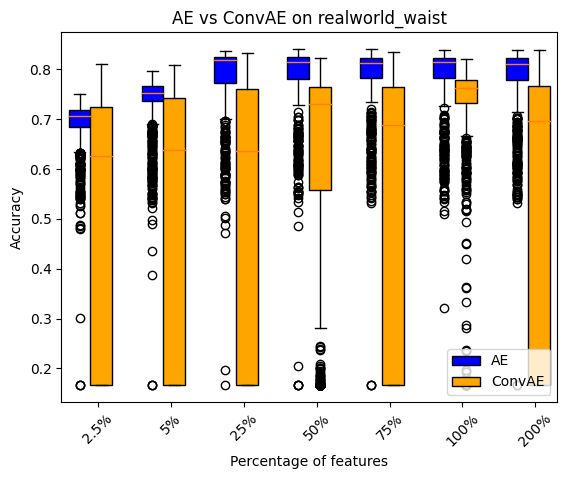

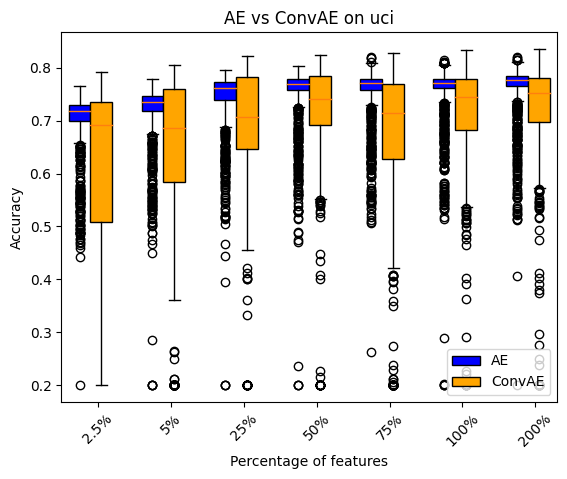

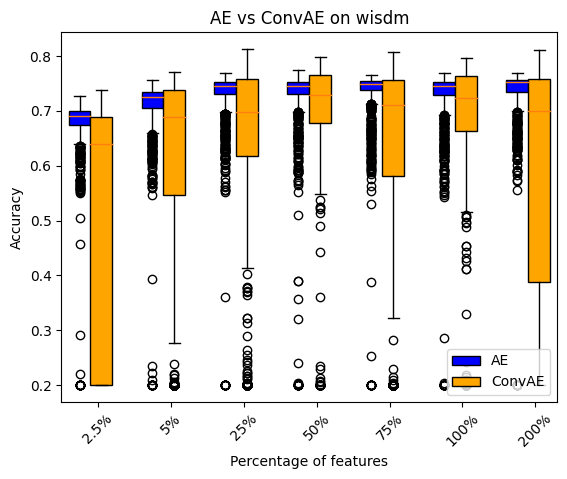

In [194]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'ae') | (all_df['model'] == 'convae')].groupby(['dataset', 'model', 'percent'])):
    # print(index, dataset, model, percent)
    pos_correction = 0 if model == 'ae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['AE', 'ConvAE'], loc='lower right')
        plt.title('AE vs ConvAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('ae-vs-convae-' + dataset + '.png', dpi=300)
        plt.show()

## TAE v ConvTAE

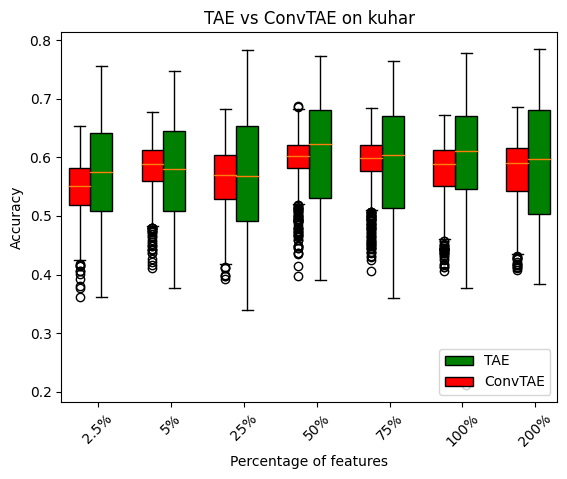

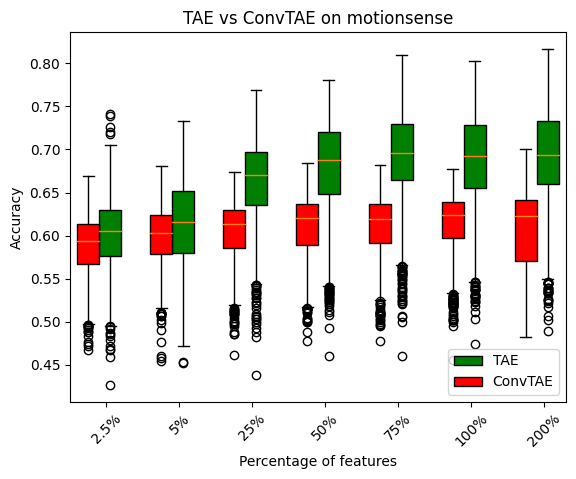

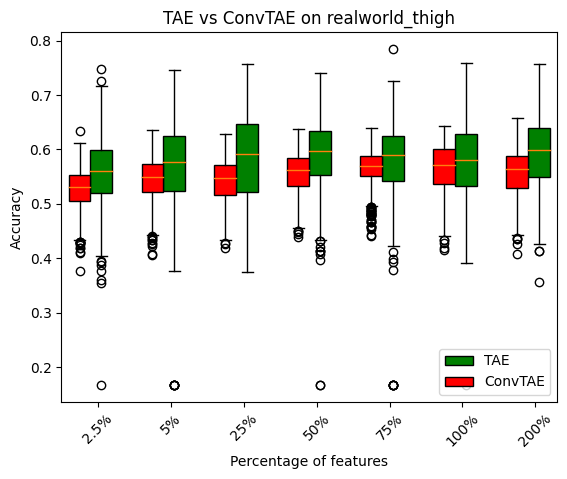

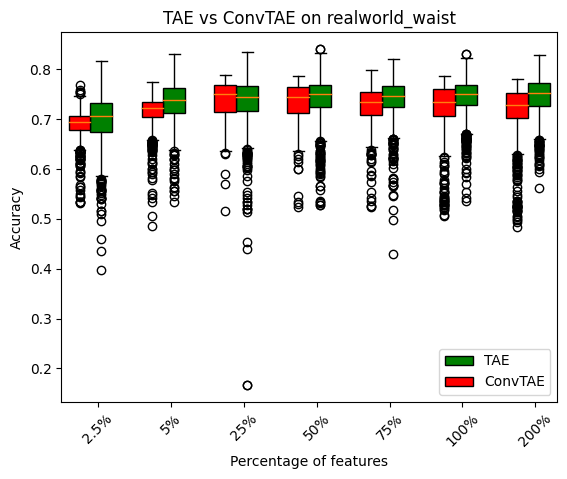

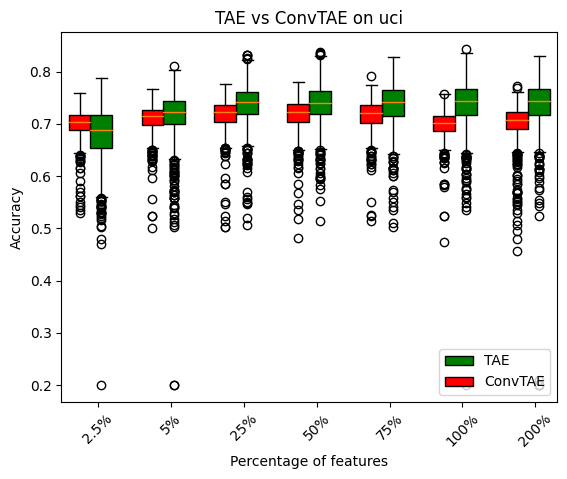

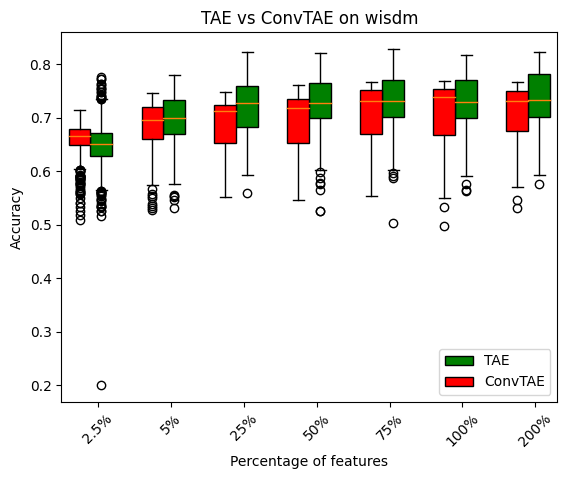

In [195]:
box_width = 0.6
plots = []
for index, ((dataset, model, percent), group) in enumerate(all_df[(all_df['model'] == 'tae') | (all_df['model'] == 'convtae')].groupby(['dataset', 'model', 'percent'])):
    # print(index, dataset, model, percent)
    pos_correction = 0 if model == 'tae' else box_width
    plots.append(plt.boxplot(
        group[['score']],
        positions=[index%7*2+pos_correction],
        widths = box_width,
        patch_artist=True, boxprops = dict(facecolor = colors[model])))
    if index % 14 == 13:
        plt.xticks([i+0.5 for i in range(0,14,2)], [str(i)+'%' for i in percentages], rotation=45)
        plt.legend([plots[0]["boxes"][0], plots[7]["boxes"][0]], ['TAE', 'ConvTAE'], loc='lower right')
        plt.title('TAE vs ConvTAE on ' + dataset)
        plt.xlabel('Percentage of features')
        plt.ylabel('Accuracy')
        plt.savefig('tae-vs-convtae-' + dataset + '.png', dpi=300)
        plt.show()